# Airfoil experiments
All data is available in the repository

In [2]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


# Setup

In [3]:
qmc_points = np.loadtxt('../sobol_6_8000.txt')
qmc_points = qmc_points[1:].reshape((8000,6))

large_qmc_points = np.loadtxt('../sobol_6_131072.txt')
all_points = qmc_points.copy()
forces = np.array(np.loadtxt('../force_6_params.dat'))


N = min(qmc_points.shape[0], forces.shape[0])
qmc_points = qmc_points[:N,:]
forces  = forces[:N,:]


input_size=6
train_size=128
validation_size=128

epochs = 500000


airfoils_network = [12, 12, 10, 12, 10, 12, 10, 10, 12,1]


# One network per variable

In [3]:
force_names=['Lift', 'Drag']
batch_sizes=[train_size]
train_sizes = [16, 32, train_size]

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}

losses = ["mean_squared_error", "mean_absolute_error"]

for optimizer in optimizers.keys():
    for loss in losses:
        display(HTML("<h1>{} with {}</h1>".format(optimizer, loss)))

        for batch_size in batch_sizes:
            tables = Tables.make_default()
            
            for (n, f) in enumerate(force_names):
                seed_random_number(random_seed)
                network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                         network=airfoils_network, train_size=train_size,
                                                         validation_size=validation_size,
                                                        loss=loss, 
                                                        large_integration_points=large_qmc_points)
                
                output_information = OutputInformation(tables=tables, title=force_names[n],
                                                      short_title=force_names[n])
                showAndSave.prefix='airfoil_%s_%s_%s_ts_%d_bs_%d' %(optimizer, loss, f,batch_size, train_size)
                get_network_and_postprocess(qmc_points, forces[:,n+1], network_information = network_information,
                    output_information = output_information)
            
            showAndSave.prefix='airfoil_%s_%s_all_ts_%d_bs_%d' %(optimizer, loss, batch_size, train_size)
            tables.write_tables()
  

KeyboardInterrupt: 

# As a function of training errors


Training took 569.4595639705658 seconds

Training took 728.5716953277588 seconds

Training took 641.4692530632019 seconds

Training took 664.823004245758 seconds

Training took 691.0310657024384 seconds
Best network index: 1
Total learning time took: 3330 s
Training took 698.8179442882538 seconds
Number of parameters: 1149
(1001,)
(1001, 6)
Memory usage: 1043220
Memory usage: 1043220
Memory usage: 1043220

Training took 713.3998556137085 seconds

Training took 637.8826458454132 seconds

Training took 625.7988858222961 seconds

Training took 630.0969605445862 seconds

Training took 647.7332360744476 seconds
Best network index: 1
Total learning time took: 3285 s
Training took 654.0862550735474 seconds
Number of parameters: 1149
(1001,)
(1001, 6)
Memory usage: 1627028
Memory usage: 1627028
Memory usage: 1627028

Training took 666.925089597702 seconds

Training took 699.6917283535004 seconds

Training took 721.707816362381 seconds

Training took 753.4399943351746 seconds

Training took 77

OSError: [Errno 12] Cannot allocate memory

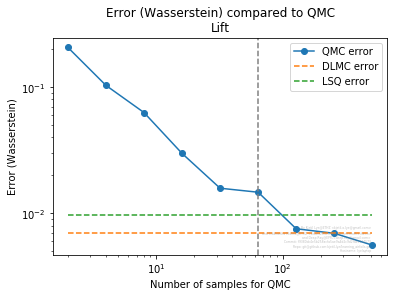

In [5]:
force_names=['Lift', 'Drag']
epochs = 500000

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}
loss = "mean_squared_error"
optimizer='SGD'
for n in range(len(force_names)):
    f=force_names[n]
    tables = Tables.make_default()
    def run_function(network_information, output_information):
        showAndSave.prefix='airfoil_convergence_%s_%s_%s_ts_%d_bs_%d' %(optimizer, loss, f, 
                                                                        network_information.batch_size,
                                                                        network_information.train_size)
        showAndSave.silent=True
        print_comparison_table.silent = True
        get_network_and_postprocess(qmc_points, forces[:,n+1], network_information = network_information,
            output_information = output_information)
        
        showAndSave.prefix='airfoil_convergence_result_%s_%s_%s' %(optimizer, loss, f)
        
        
    network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                     network=airfoils_network, train_size=None,
                                                     validation_size=None,
                                                    loss=loss, 
                                                    large_integration_points=None,
                                                    tries=5)
            
    output_information = OutputInformation(tables=tables, title=force_names[n],
                                          short_title=force_names[n])
    
    plot_train_size_convergence(network_information,
                               output_information, 
                               run_function,
                               qmc_points.shape[0]
                               )

In [ ]:
print(output_information.__dict__)

In [ ]:
force_names=['Lift', 'Drag']
epochs = 500000

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}
loss = "mean_squared_error"
optimizer='SGD'
selections = ['mean', 'mean_train', 'mean_tail', 'prediction']
for selection in selections:
    display(HTML("<h1>%s</h1>" % selection))
    for n in range(len(force_names)):
        f=force_names[n]
        tables = Tables.make_default()
        def run_function(network_information, output_information):
            showAndSave.prefix='airfoil_convergence_%s_%s_%s_%s_ts_%d_bs_%d' %(selection, optimizer, loss, f, 
                                                                            network_information.batch_size,
                                                                            network_information.train_size)
            showAndSave.silent=True
            print_comparison_table.silent = True
            get_network_and_postprocess(qmc_points, forces[:,n+1], network_information = network_information,
                output_information = output_information)
            
            showAndSave.prefix='airfoil_convergence_result_%s_%s_%s_%s' %(selection, optimizer, loss, f)
            
            
        network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                         network=airfoils_network, train_size=None,
                                                         validation_size=None,
                                                        loss=loss, 
                                                        selection=selection,
                                                        large_integration_points=None,
                                                        tries=10)
                
        output_information = OutputInformation(tables=tables, title=force_names[n],
                                              short_title=force_names[n])
        
        plot_train_size_convergence(network_information,
                                   output_information, 
                                   run_function,
                                   qmc_points.shape[0]
                                   )